# Understanding the Question

Working as a data scientist for the electric-car sharing service my objective is to try and understand electric car usage over time.


**1. Defining the objectives of the study**

The objective questions are;

1.   Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
2.   What is the most popular hour for returning cars?
3.   What station is the most popular?
4.   What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
5.   Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?





**2. Defining the tasks to perform**

*  Load datasets
*  Check for missing data
*  Check for duplicates
*  Drop duplicates if present





# Data Analysis

In [ ]:
# Importing the Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [ ]:
# Load our database

Autolib = pd.read_csv('/content/Autolib_dataset (2).csv', sep=',' , encoding='utf-8')

In [ ]:
# Preview our database
Autolib.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [ ]:
# Preview te last 5 rows of our database
Autolib.tail()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


In [ ]:
#  We can getting to know more about the dataset by accessing its information 

Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [ ]:
# We only require the bluecar, time, station, postal code, utilib, utilib1.4 columns hence, check fro validity.
# Validity we drop the columns we don't require during the study.
to_drop = ['Charge Slots', 'Displayed comment', 'Geo point', 'Rental status', 'Scheduled at', 'Subscription status', 'Status', 'Public name' ]
Autolib.drop(to_drop, axis=1, inplace=True)

In [ ]:
# Check the shape of our datset
Autolib.shape

(5000, 17)

In [ ]:
# Checking the info of the table after dropping the unnecessary columns
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Address             5000 non-null   object
 1   Cars                5000 non-null   int64 
 2   Bluecar counter     5000 non-null   int64 
 3   Utilib counter      5000 non-null   int64 
 4   Utilib 1.4 counter  5000 non-null   int64 
 5   Charging Status     5000 non-null   object
 6   City                5000 non-null   object
 7   ID                  5000 non-null   object
 8   Kind                5000 non-null   object
 9   Postal code         5000 non-null   int64 
 10  Slots               5000 non-null   int64 
 11  Station type        5000 non-null   object
 12  year                5000 non-null   int64 
 13  month               5000 non-null   int64 
 14  day                 5000 non-null   int64 
 15  hour                5000 non-null   int64 
 16  minute              5000

In [ ]:
# Completeness; We check for any missing values
Autolib.isnull().sum().sort_values(ascending=False)

minute                0
ID                    0
Cars                  0
Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
Charging Status       0
City                  0
Kind                  0
hour                  0
Postal code           0
Slots                 0
Station type          0
year                  0
month                 0
day                   0
Address               0
dtype: int64

We note that our data has no missing values, hence we proceed with our analysis.

In [ ]:
# Consistency; Checking for duplicates.
# Duplicates are data points that are repeated in your dataset.
Autolib.duplicated().value_counts()

False    5000
dtype: int64

We note that our data has no duplicates hence, we proceed with our analysis.

In [ ]:
# Standardization; Replacing column names which are uppercase, with spaces, 
# and whitespace all around. 
Autolib.columns = Autolib.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [ ]:
# Lets preview the clean data that we have 
Autolib.head()

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1.4_COUNTER,CHARGING_STATUS,CITY,ID,KIND,POSTAL_CODE,SLOTS,STATION_TYPE,YEAR,MONTH,DAY,HOUR,MINUTE
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,2,station,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,0,station,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,station,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,operational,Paris,paris-eugeneoudine-51,STATION,75013,2,station,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,3,station,2018,4,8,17,23


*  We shall use the data above for our analysis and try to answer some of the research questions that were asked



# Data Exploration

In [ ]:
# The code sort out the values for postalcode, hour, day and minute in ascending order

df = Autolib.sort_values(by=['POSTAL_CODE','DAY','HOUR','MINUTE'],ascending=True)
df.head()

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1.4_COUNTER,CHARGING_STATUS,CITY,ID,KIND,POSTAL_CODE,SLOTS,STATION_TYPE,YEAR,MONTH,DAY,HOUR,MINUTE
2854,7 rue du Colonel Driant,0,0,0,0,nonexistent,Paris,paris-coloneldriant-7,STATION,75001,2,station,2018,4,1,10,54
2459,62 rue Jean-Jacques Rousseau,1,1,0,2,nonexistent,Paris,paris-jeanjacquesrousseau-62,STATION,75001,1,station,2018,4,1,14,25
4943,3 place du Louvre,0,0,0,0,nonexistent,Paris,paris-louvre-3,PARKING,75001,3,station,2018,4,1,15,14
4573,4 Rue Croix des Petits Champs,2,2,0,0,nonexistent,Paris,paris-croixdespetitschamps-4,STATION,75001,2,station,2018,4,1,21,27
1618,14 rue Bertin PoirÃ©e,0,0,0,0,operational,Paris,paris-bertinpoiree-14,STATION,75001,5,station,2018,4,2,1,38


In [ ]:
# Creating a column for the difference in cars

df['CARS_RECORD'] = df.CARS.diff()

In [ ]:
# Creating the difference column for utilib counter

df['UTILIB_RECORD'] = df.UTILIB_COUNTER.diff()

In [ ]:
# Creating the difference column of the utilib 1.4 counter

df['UTILIB_1.4_RECORD'] = df['UTILIB_1.4_COUNTER'].diff()

In [ ]:
# Viewing the shape of the new table
df.shape

(5000, 20)

In [ ]:
# Viewing the first 5 columns of the table
df.head()

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1.4_COUNTER,CHARGING_STATUS,CITY,ID,KIND,POSTAL_CODE,SLOTS,STATION_TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,CARS_RECORD,UTILIB_RECORD,UTILIB_1.4_RECORD
2854,7 rue du Colonel Driant,0,0,0,0,nonexistent,Paris,paris-coloneldriant-7,STATION,75001,2,station,2018,4,1,10,54,NaN,NaN,NaN
2459,62 rue Jean-Jacques Rousseau,1,1,0,2,nonexistent,Paris,paris-jeanjacquesrousseau-62,STATION,75001,1,station,2018,4,1,14,25,1.0,0.0,2.0
4943,3 place du Louvre,0,0,0,0,nonexistent,Paris,paris-louvre-3,PARKING,75001,3,station,2018,4,1,15,14,-1.0,0.0,-2.0
4573,4 Rue Croix des Petits Champs,2,2,0,0,nonexistent,Paris,paris-croixdespetitschamps-4,STATION,75001,2,station,2018,4,1,21,27,2.0,0.0,0.0
1618,14 rue Bertin PoirÃ©e,0,0,0,0,operational,Paris,paris-bertinpoiree-14,STATION,75001,5,station,2018,4,2,1,38,-2.0,0.0,0.0


In [ ]:
# Consistency; Checking for duplicates.
# Duplicates are data points that are repeated in your dataset.
df.duplicated().value_counts()

False    5000
dtype: int64

In [ ]:
# Completeness; We check for any missing values
df.isnull().sum().sort_values(ascending=False)

UTILIB_1.4_RECORD     1
CARS_RECORD           1
UTILIB_RECORD         1
KIND                  0
CARS                  0
BLUECAR_COUNTER       0
UTILIB_COUNTER        0
UTILIB_1.4_COUNTER    0
CHARGING_STATUS       0
CITY                  0
ID                    0
POSTAL_CODE           0
SLOTS                 0
STATION_TYPE          0
YEAR                  0
MONTH                 0
DAY                   0
HOUR                  0
MINUTE                0
ADDRESS               0
dtype: int64

In [ ]:
# We fill the null or missing columns from the data frame with 0
df2 = df.fillna(0)

In [ ]:
df2.shape

(5000, 20)

In [ ]:
# The code below will help describe the data.
# This will be important while analyzing the database and trying to understand each column uin respect to its std, max, min, percentiles and mean.
df2.describe()

,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1.4_COUNTER,POSTAL_CODE,SLOTS,YEAR,MONTH,DAY,HOUR,MINUTE,CARS_RECORD,UTILIB_RECORD,UTILIB_1.4_RECORD
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000,0.000000,0.000200,0.000200
std,2.035274,2.035274,0.246698,0.356506,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741,2.431621,0.340915,0.491781
min,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000,-7.000000,-2.000000,-3.000000
25%,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000,-1.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000,1.000000,0.000000,0.000000
max,7.000000,7.000000,2.000000,3.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000,7.000000,2.000000,3.000000


In [ ]:
# The code will help print out the names of the columns to aid in our analysis of each column and knowing its form after standardization.
df2.columns

Index(['ADDRESS', 'CARS', 'BLUECAR_COUNTER', 'UTILIB_COUNTER',
       'UTILIB_1.4_COUNTER', 'CHARGING_STATUS', 'CITY', 'ID', 'KIND',
       'POSTAL_CODE', 'SLOTS', 'STATION_TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'MINUTE', 'CARS_RECORD', 'UTILIB_RECORD', 'UTILIB_1.4_RECORD'],
      dtype='object')

In [ ]:
# The code below will help us identify the value count of each day
df2['DAY'].value_counts()

5    584
1    584
3    583
9    578
4    576
8    551
2    545
6    542
7    457
Name: DAY, dtype: int64

* We note that the fifth and the first day have a tie in the record of the number of the highest count in the day format.
* This shows that the database has a high record of the first and fifth day



In [ ]:
# Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

df1 = df2[(df2['CITY'] == 'Paris')
             & (df2['BLUECAR_COUNTER'] - df['BLUECAR_COUNTER'].shift() <= -1)
             & (df2['CHARGING_STATUS'] == 'operational')
             & (df2['YEAR'] == 2018)
             & (df2['MONTH'] == 4)]['HOUR'].value_counts()
df1[:1]

13    35
Name: HOUR, dtype: int64

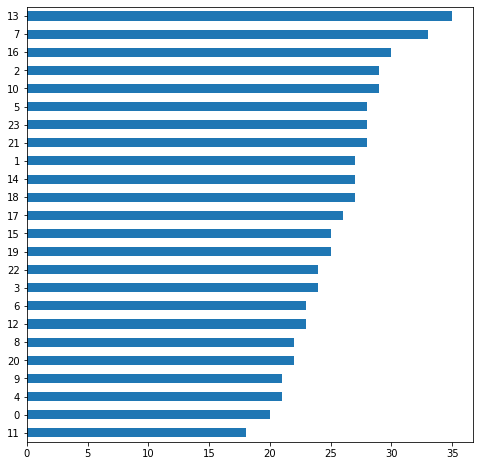

In [ ]:
# The code below draws a barh graph of all the hours counts in respect to the city of paris
df1.sort_values(ascending=True).plot(kind='barh', figsize=(8,8))

In [ ]:
# The code will help us identify the counts in cars 

df2['CARS'].value_counts()

0    1447
3     672
1     663
4     636
2     628
5     574
6     341
7      39
Name: CARS, dtype: int64

Text(0.5, 1.0, 'MOST POPULAR HOUR FOR RETURNING CARS')

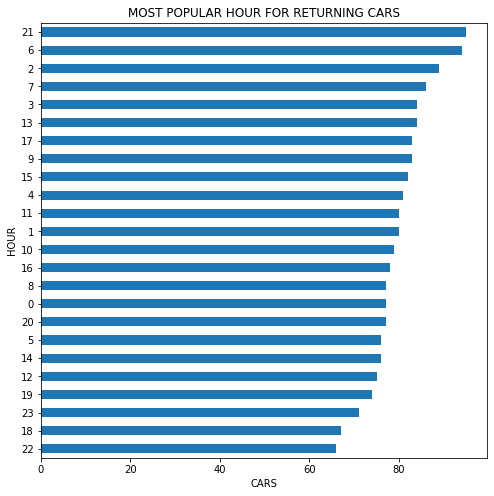

In [ ]:
# What is the most popular hour for returning cars?

df2[df2['CARS_RECORD'] >= +1]['HOUR'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(8,8))
plt.ylabel('HOUR')
plt.xlabel('CARS')
plt.title('MOST POPULAR HOUR FOR RETURNING CARS')

At 21hrs is the most popular hour of returning cars, this is because of the plot in the graph.

In [ ]:
# What is the most popular city?

df2['CITY'].value_counts()[:1]

Paris    2816
Name: CITY, dtype: int64

In [ ]:
# What station is the most popular? According to address.
df2['ADDRESS'].value_counts()[:1]


8 Avenue de la Porte de Montrouge    13
Name: ADDRESS, dtype: int64

We realise that 8 Avenue de la Porte de Montrouge is the most popular overall station.

In [ ]:
# What station is most popular according to postal_code

df2['POSTAL_CODE'].value_counts()[:1]

75015    274
Name: POSTAL_CODE, dtype: int64

In [ ]:
# What station is the most popular? According to ID.
df2['ID'].value_counts()[:1]

paris-portedemontrouge-8    13
Name: ID, dtype: int64

In [ ]:
# What postal code is the most popular for picking up Blue cars?

df2[df2['BLUECAR_COUNTER'] - df['BLUECAR_COUNTER'].shift() <= -1]['POSTAL_CODE'].value_counts()[:1]

75015    115
Name: POSTAL_CODE, dtype: int64

We realise that the postal code 75015 has the highest count in the registry of picking up blue cars, while 94100 has the lowest count in picking up blue cars.

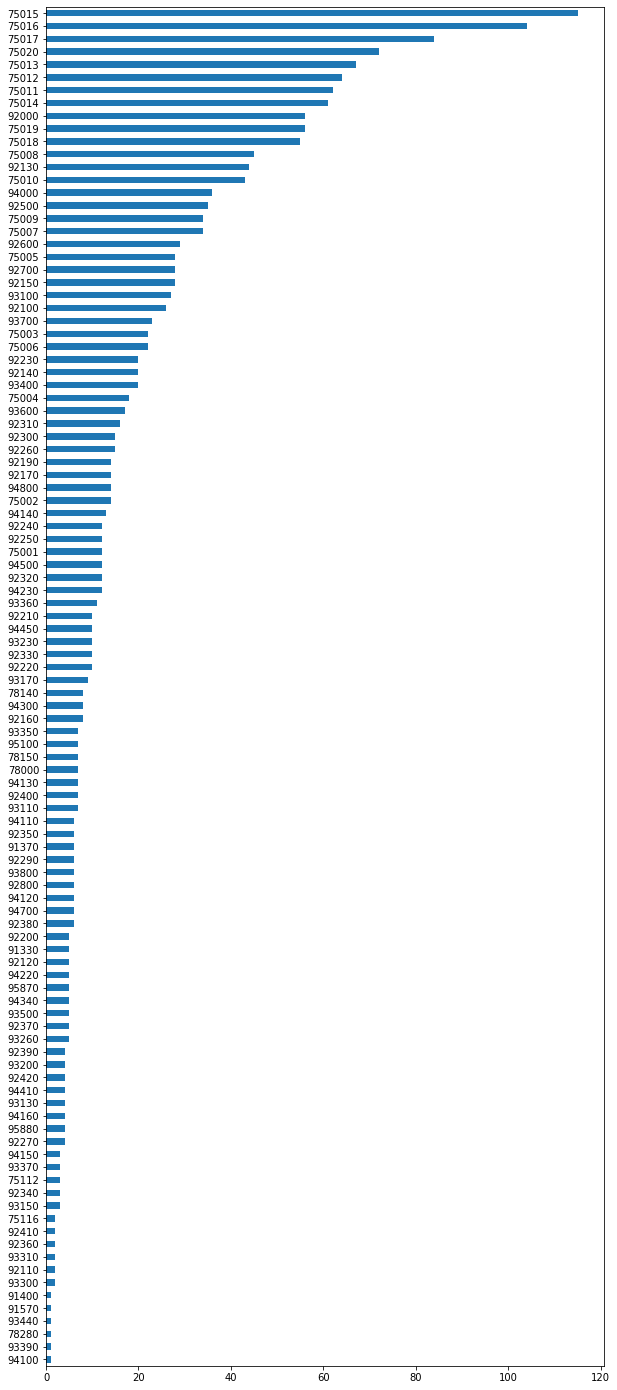

In [ ]:
# The code below draws a bar graph of all the stations for picking up Blue cars according to the ascending order from the most popular.
df2[df2['BLUECAR_COUNTER'] - df['BLUECAR_COUNTER'].shift() <= -1]['POSTAL_CODE'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,25))


We note that the Postal_code 75015 has the highest count of picking blue cars

In [ ]:
# Does the most popular station belong to that postal code?

df2[df2['POSTAL_CODE'] == 75015]['ADDRESS'].value_counts()[:1]

31 boulevard de Grenelle    11
Name: ADDRESS, dtype: int64

No, the most popular station doesn't match the bluecar postal code maximum picking of cars.

In [ ]:
# What postal code is the most popular for picking up Utilib.

df2[df2['UTILIB_RECORD'] <= -1]['POSTAL_CODE'].value_counts()[:1]

75016    18
Name: POSTAL_CODE, dtype: int64

In [ ]:
# What postal code is the most popular for picking up a blue car?

df2[df2['BLUECAR_COUNTER'] - df['BLUECAR_COUNTER'].shift() <= -1]['POSTAL_CODE'].value_counts()[:1]

75015    115
Name: POSTAL_CODE, dtype: int64

In [ ]:
# What postal code is the most popular for picking up Utilib 1.4?


df2[df2['UTILIB_1.4_RECORD'] <= -1]['POSTAL_CODE'].value_counts()[:1]

75017    30
Name: POSTAL_CODE, dtype: int64

* We notice that there's a difference in the postal code for the pick up of cars between bluecar counter, the utilib counter and the utilib 1.4 counter.
* Utilib counter and utilib 1.4 counter have a different postal code compared to blue car.
* 75016, 75017 and 75015 respectively. 
* In generall more blue cars are recorded as picked compared to utilib and utilib 1.4 counters.


In [ ]:
df15 = df2[df2['UTILIB_1.4_RECORD'] <= -1]['POSTAL_CODE'].value_counts()
df16 = df2[df2['BLUECAR_COUNTER'] - df['BLUECAR_COUNTER'].shift() <= -1]['POSTAL_CODE'].value_counts()
df17 = df2[df2['UTILIB_RECORD'] <= -1]['POSTAL_CODE'].value_counts()

(array([[74.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [66., 16.,  9.,  4.,  3.,  4.,  1.,  1.,  0.,  2.],
        [73.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([  1. ,  12.4,  23.8,  35.2,  46.6,  58. ,  69.4,  80.8,  92.2,
        103.6, 115. ]),
 <a list of 3 Lists of Patches objects>)

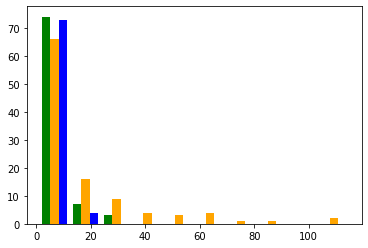

In [ ]:
plt.hist([df15, df16, df17], color=['green', 'orange', 'blue'], )

In [ ]:
df18 = df2['ADDRESS'].value_counts()
df19 = df2['POSTAL_CODE'].value_counts()
df20 = df2['ID'].value_counts()

(array([[1.104e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [6.300e+01, 1.400e+01, 1.000e+01, 6.000e+00, 3.000e+00, 3.000e+00,
         5.000e+00, 0.000e+00, 2.000e+00, 1.000e+00],
        [1.105e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([  1. ,  28.3,  55.6,  82.9, 110.2, 137.5, 164.8, 192.1, 219.4,
        246.7, 274. ]),
 <a list of 3 Lists of Patches objects>)

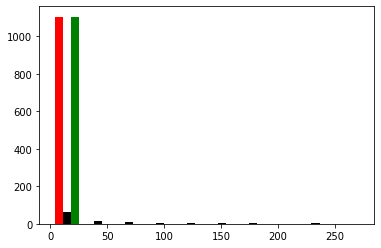

In [ ]:
plt.hist([df18, df19, df20], color=['red', 'black', 'green'])

In [308]:
# Returned utilib 1.4 counter records according to postal codes.

df2[df2['UTILIB_1.4_RECORD'] >= +1]['POSTAL_CODE'].value_counts()[:1]

75017    31
Name: POSTAL_CODE, dtype: int64

In [307]:
# Returned blue car counter records according to postal codes.

df2[df2['BLUECAR_COUNTER'] - df['BLUECAR_COUNTER'].shift() >= +1]['POSTAL_CODE'].value_counts()[:1]

75016    100
Name: POSTAL_CODE, dtype: int64

In [306]:
# Returned utilib counter records with respect to postal codes.

df2[df2['UTILIB_RECORD'] >= +1]['POSTAL_CODE'].value_counts()[:1]

75016    18
Name: POSTAL_CODE, dtype: int64

In [304]:
df21 = df2[df2['UTILIB_RECORD'] >= +1]['POSTAL_CODE'].value_counts()
df22 = df2[df2['BLUECAR_COUNTER'] - df['BLUECAR_COUNTER'].shift() >= +1]['POSTAL_CODE'].value_counts()
df23 = df2[df2['UTILIB_1.4_RECORD'] >= +1]['POSTAL_CODE'].value_counts()

(array([[71.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [52., 23.,  8.,  4.,  4.,  3.,  3.,  2.,  0.,  3.],
        [72.,  9.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 3 Lists of Patches objects>)

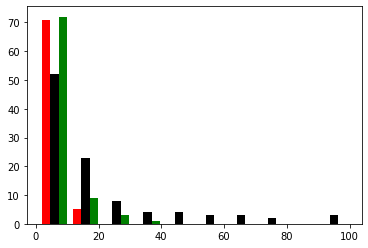

In [305]:
plt.hist([df21, df22, df23], color=['red', 'black', 'green'])